In [37]:
# To read file and create Dataframe

import pandas as pd
import numpy as np

# Libraries for Visualization

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve


# Ignore Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the csv file

df = pd.read_csv('./Breast Cancer Data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There are no null values in out dataset

In [6]:
df.id.nunique()

569

In [7]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

knowing the type of diagnosis. Here we have B and M which stands for Benign and Malignant respectively.

In [8]:
df.shape

(569, 32)

In [9]:
df.drop(columns='id', inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Dropping id column as it contains unique information with high cardinality.

In [10]:
numerical_cols = df.select_dtypes(include=['float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

## EDA

### Univariate Analysis

In [11]:
def univariate_numerical_analysis(df, column, figsize=(8,6), bins = 10):
    # Measures of central tendency
    print("Measures of central tendency for", column)
    print("Mean:", df[column].mean())
    print("Median:", df[column].median())
    print("Mode:", df[column].mode().values[0])
    print()

    # Measures of dispersion
    print("Measures of dispersion for", column)
    print("Standard Deviation:", df[column].std())
    print("Range:", df[column].max() - df[column].min())
    print()
    
    # Plot the histogram
    _, ax_hist = plt.subplots(
        nrows=1,  # Number of rows of the subplot grid=1
        figsize=figsize,
    )  # creating the 2 subplots
    sns.histplot(data=df, x=column, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(
        df[column].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist.axvline(
        df[column].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.show()

Measures of central tendency for radius_mean
Mean: 14.127291739894552
Median: 13.37
Mode: 12.34

Measures of dispersion for radius_mean
Standard Deviation: 3.524048826212078
Range: 21.128999999999998



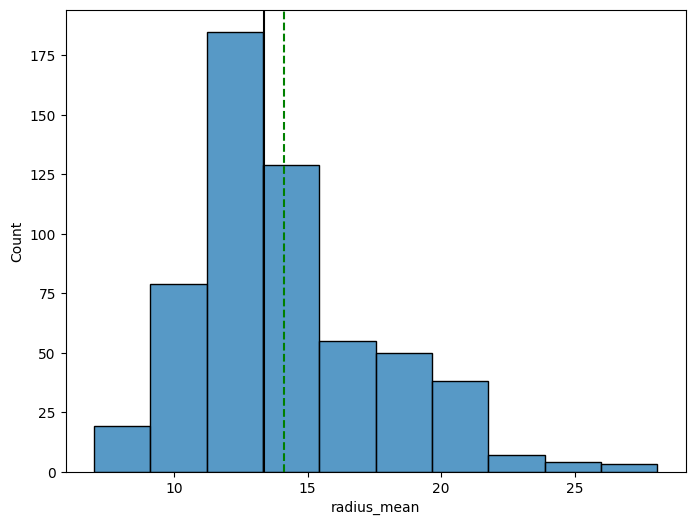

Measures of central tendency for texture_mean
Mean: 19.289648506151142
Median: 18.84
Mode: 14.93

Measures of dispersion for texture_mean
Standard Deviation: 4.301035768166949
Range: 29.57



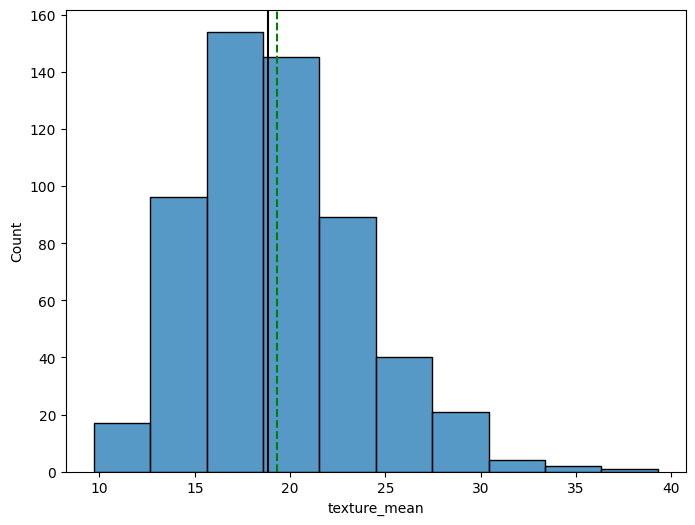

Measures of central tendency for perimeter_mean
Mean: 91.96903339191564
Median: 86.24
Mode: 82.61

Measures of dispersion for perimeter_mean
Standard Deviation: 24.2989810387549
Range: 144.71



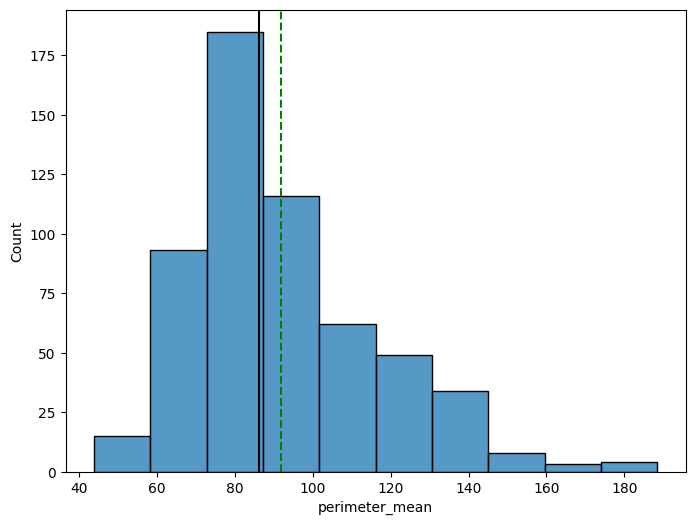

Measures of central tendency for area_mean
Mean: 654.8891036906855
Median: 551.1
Mode: 512.2

Measures of dispersion for area_mean
Standard Deviation: 351.9141291816527
Range: 2357.5



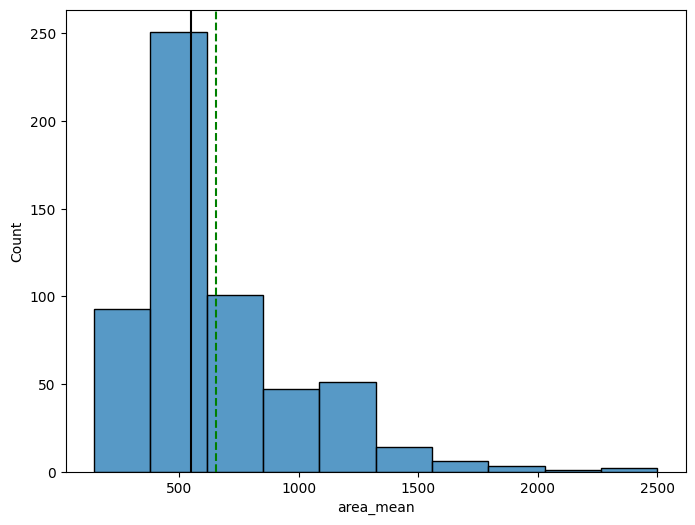

Measures of central tendency for smoothness_mean
Mean: 0.0963602811950791
Median: 0.09587
Mode: 0.1007

Measures of dispersion for smoothness_mean
Standard Deviation: 0.014064128137673616
Range: 0.11076999999999998



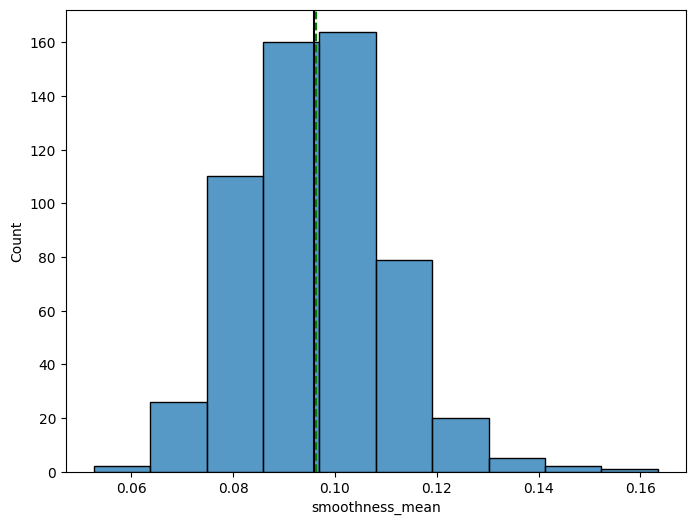

Measures of central tendency for compactness_mean
Mean: 0.10434098418277679
Median: 0.09263
Mode: 0.1147

Measures of dispersion for compactness_mean
Standard Deviation: 0.0528127579325122
Range: 0.32602



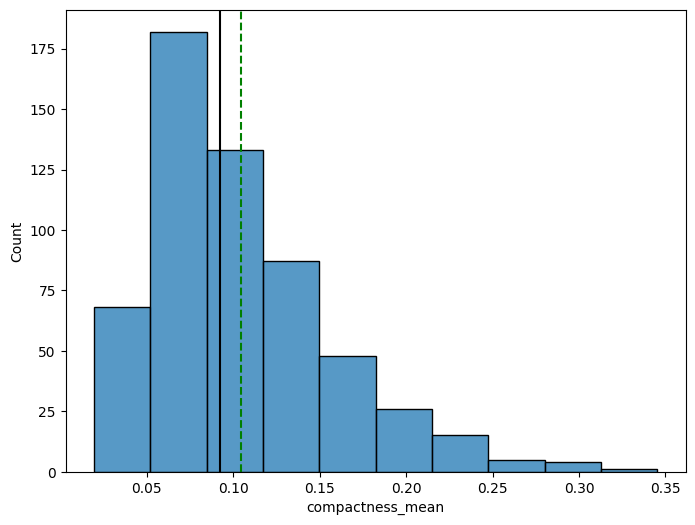

Measures of central tendency for concavity_mean
Mean: 0.0887993158172232
Median: 0.06154
Mode: 0.0

Measures of dispersion for concavity_mean
Standard Deviation: 0.0797198087078935
Range: 0.4268



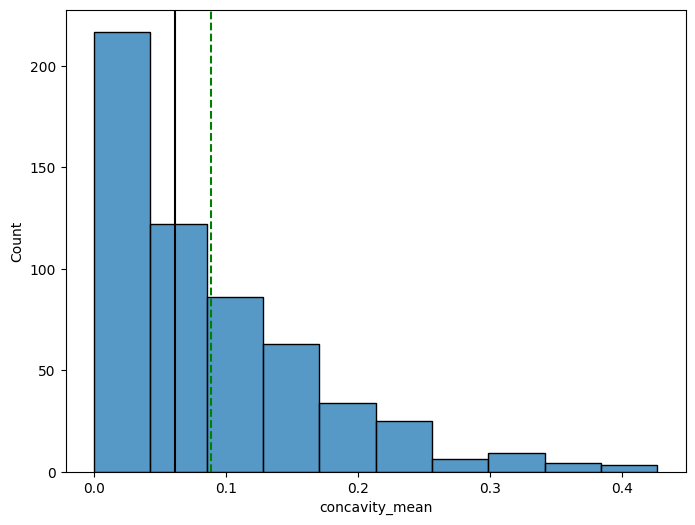

Measures of central tendency for concave points_mean
Mean: 0.04891914586994728
Median: 0.0335
Mode: 0.0

Measures of dispersion for concave points_mean
Standard Deviation: 0.03880284485915359
Range: 0.2012



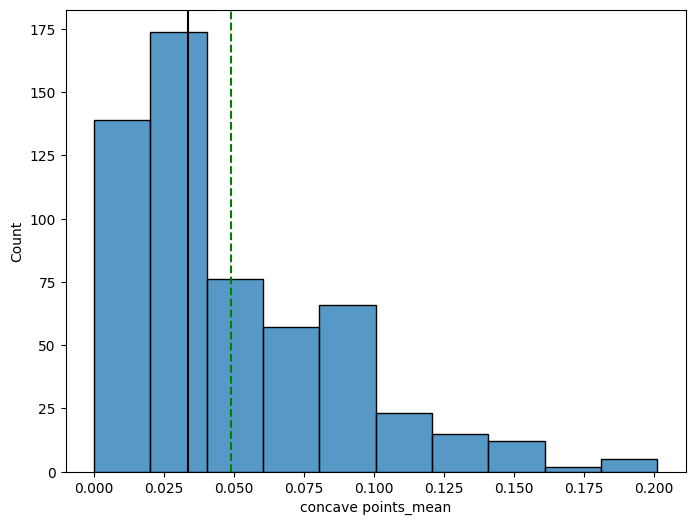

Measures of central tendency for symmetry_mean
Mean: 0.18116186291739894
Median: 0.1792
Mode: 0.1601

Measures of dispersion for symmetry_mean
Standard Deviation: 0.027414281336035712
Range: 0.198



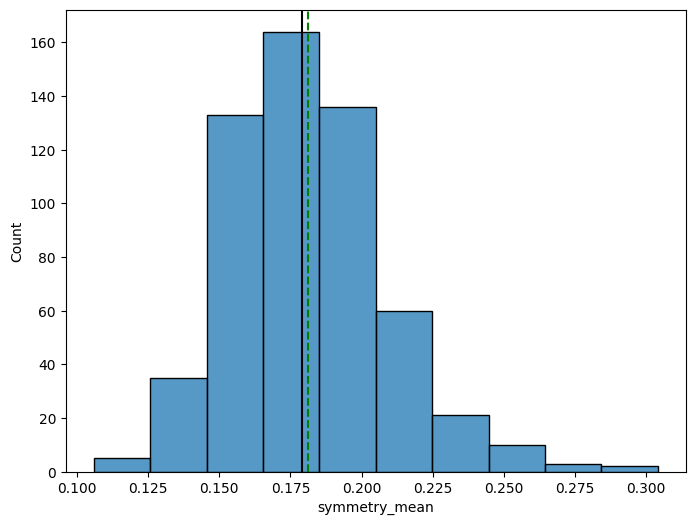

Measures of central tendency for fractal_dimension_mean
Mean: 0.06279760984182776
Median: 0.06154
Mode: 0.05667

Measures of dispersion for fractal_dimension_mean
Standard Deviation: 0.007060362795084459
Range: 0.04748



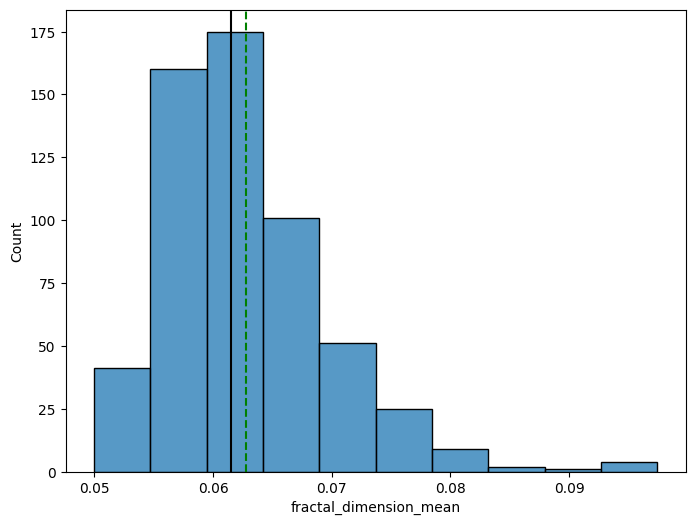

Measures of central tendency for radius_se
Mean: 0.40517205623901575
Median: 0.3242
Mode: 0.2204

Measures of dispersion for radius_se
Standard Deviation: 0.2773127329861041
Range: 2.7615000000000003



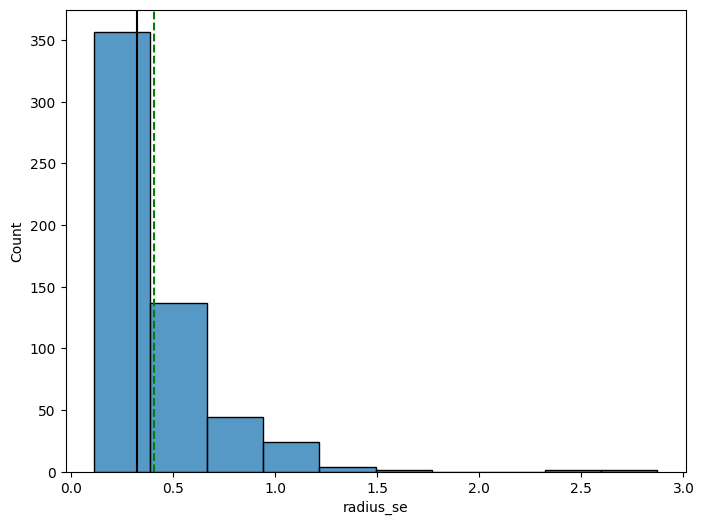

Measures of central tendency for texture_se
Mean: 1.2168534270650264
Median: 1.108
Mode: 0.8561

Measures of dispersion for texture_se
Standard Deviation: 0.5516483926172023
Range: 4.5248



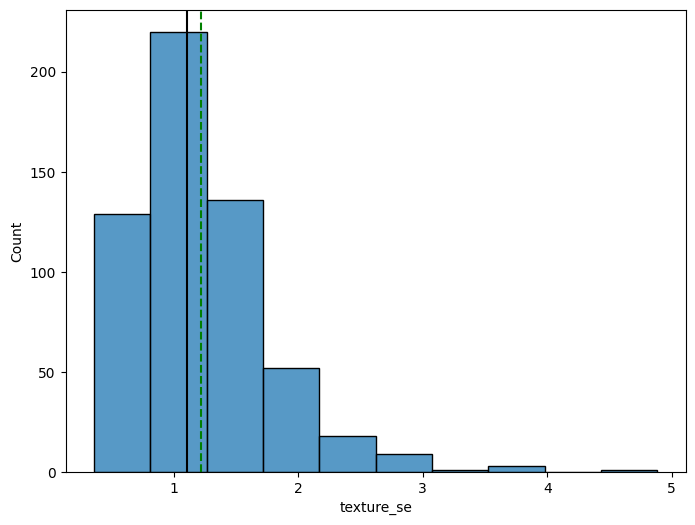

Measures of central tendency for perimeter_se
Mean: 2.8660592267135327
Median: 2.287
Mode: 1.778

Measures of dispersion for perimeter_se
Standard Deviation: 2.021854554042107
Range: 21.223



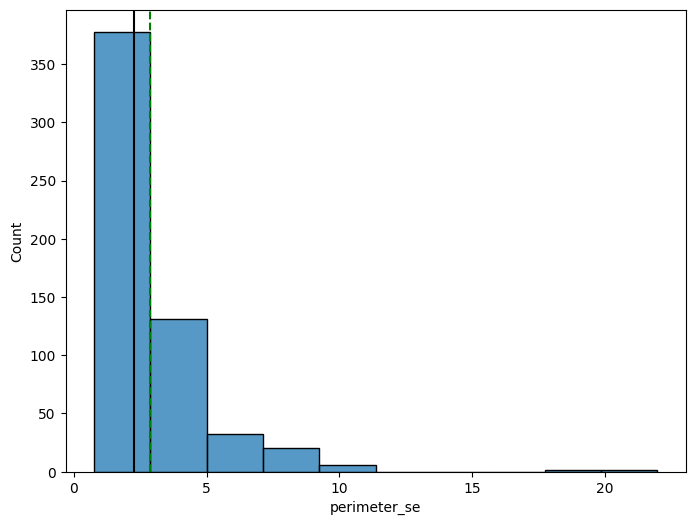

Measures of central tendency for area_se
Mean: 40.337079086116
Median: 24.53
Mode: 16.64

Measures of dispersion for area_se
Standard Deviation: 45.49100551613178
Range: 535.398



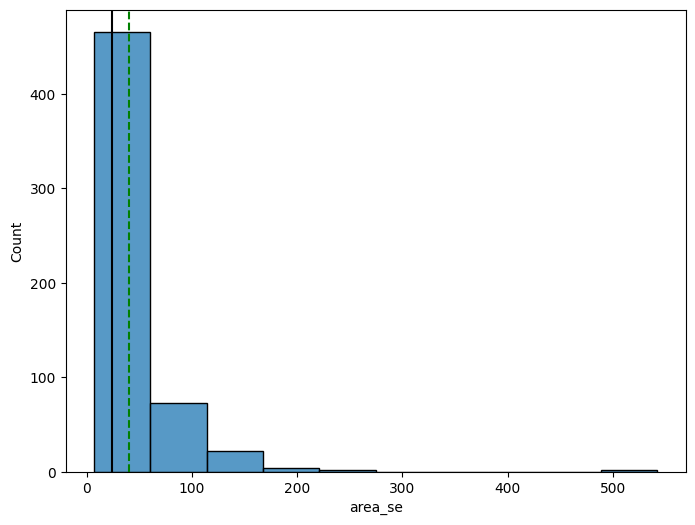

Measures of central tendency for smoothness_se
Mean: 0.007040978910369069
Median: 0.00638
Mode: 0.00508

Measures of dispersion for smoothness_se
Standard Deviation: 0.003002517943839067
Range: 0.029417000000000002



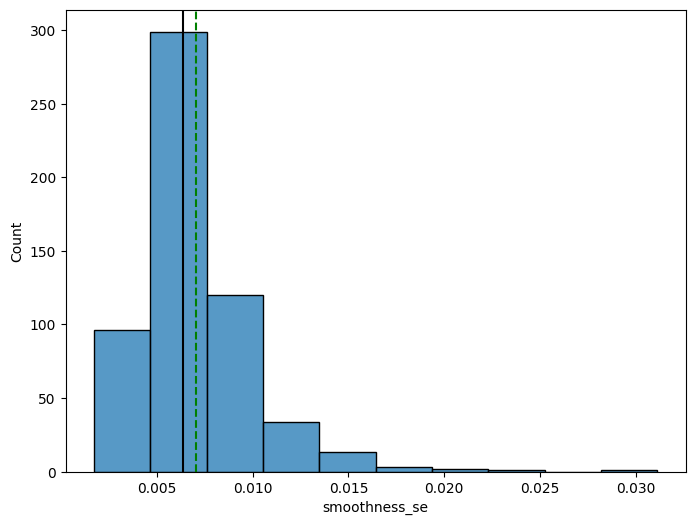

Measures of central tendency for compactness_se
Mean: 0.025478138840070295
Median: 0.02045
Mode: 0.01104

Measures of dispersion for compactness_se
Standard Deviation: 0.017908179325677377
Range: 0.133148



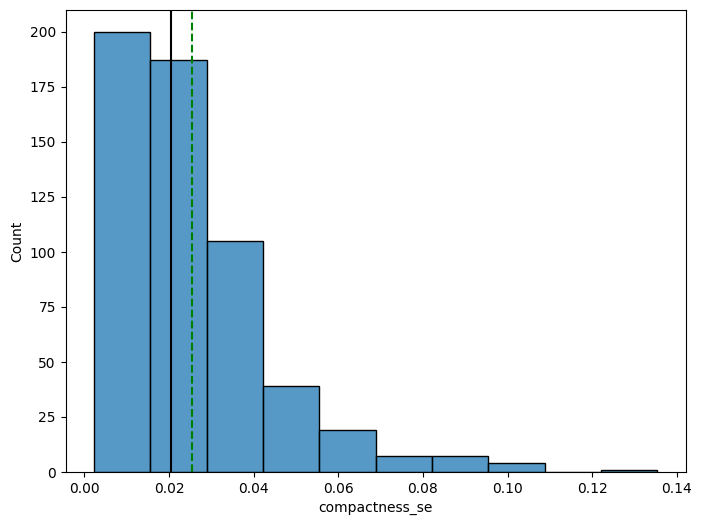

Measures of central tendency for concavity_se
Mean: 0.03189371634446397
Median: 0.02589
Mode: 0.0

Measures of dispersion for concavity_se
Standard Deviation: 0.030186060322988394
Range: 0.396



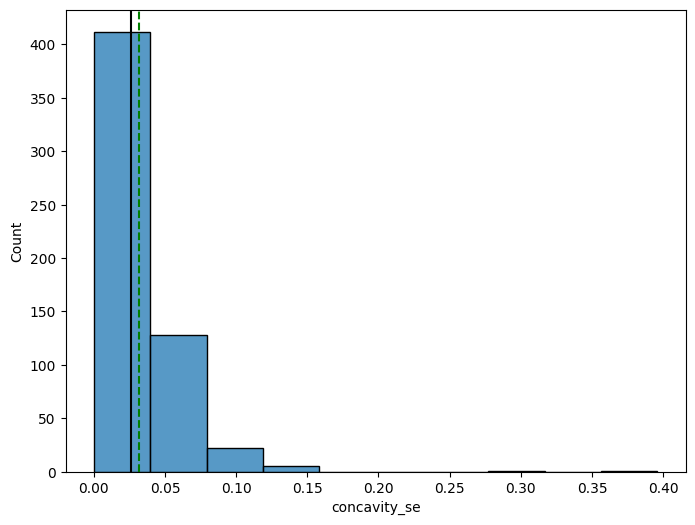

Measures of central tendency for concave points_se
Mean: 0.011796137082601054
Median: 0.01093
Mode: 0.0

Measures of dispersion for concave points_se
Standard Deviation: 0.006170285174046866
Range: 0.05279



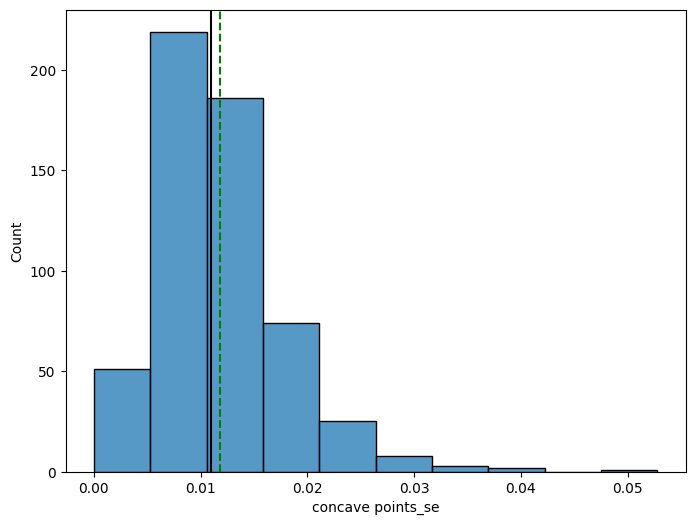

Measures of central tendency for symmetry_se
Mean: 0.02054229876977153
Median: 0.01873
Mode: 0.01344

Measures of dispersion for symmetry_se
Standard Deviation: 0.008266371528798399
Range: 0.071068



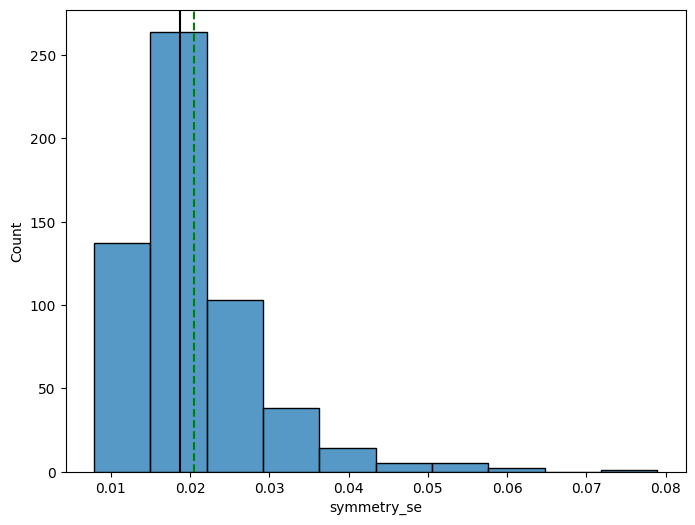

Measures of central tendency for fractal_dimension_se
Mean: 0.0037949038664323374
Median: 0.003187
Mode: 0.001784

Measures of dispersion for fractal_dimension_se
Standard Deviation: 0.0026460709670891942
Range: 0.028945199999999997



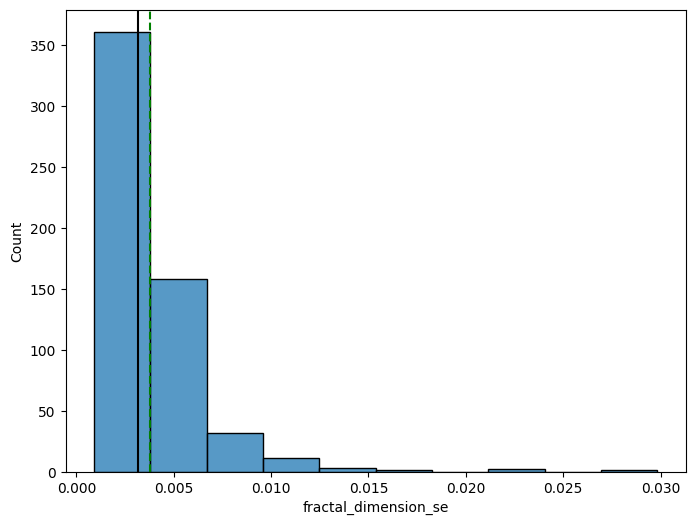

Measures of central tendency for radius_worst
Mean: 16.269189806678387
Median: 14.97
Mode: 12.36

Measures of dispersion for radius_worst
Standard Deviation: 4.833241580469324
Range: 28.11



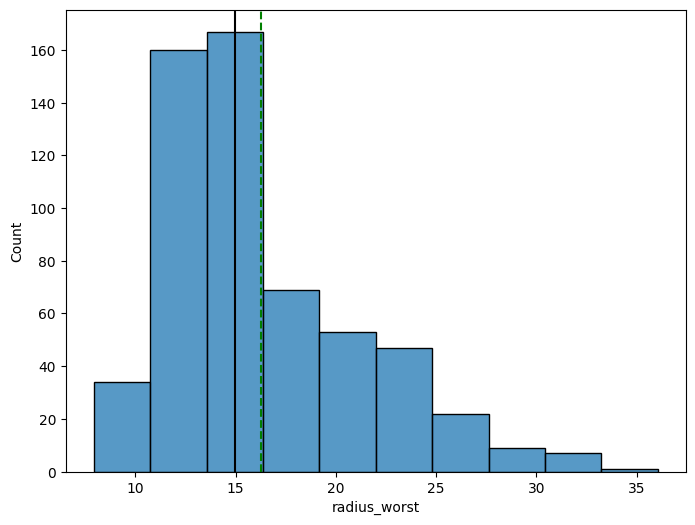

Measures of central tendency for texture_worst
Mean: 25.677223198594024
Median: 25.41
Mode: 17.7

Measures of dispersion for texture_worst
Standard Deviation: 6.146257623038323
Range: 37.519999999999996



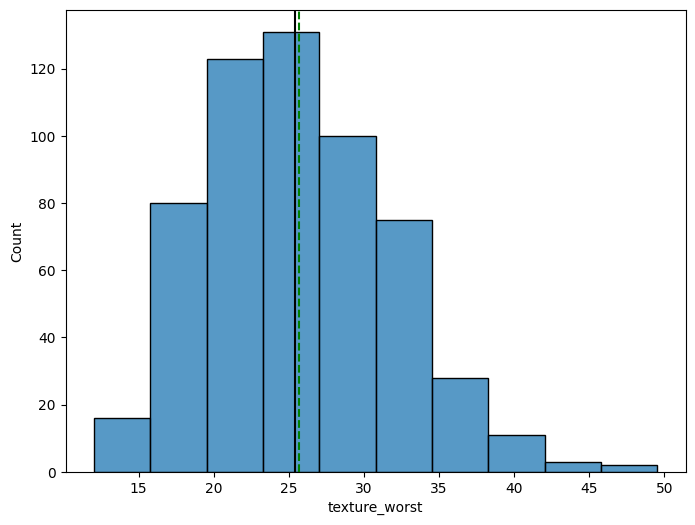

Measures of central tendency for perimeter_worst
Mean: 107.26121265377857
Median: 97.66
Mode: 101.7

Measures of dispersion for perimeter_worst
Standard Deviation: 33.60254226903635
Range: 200.79



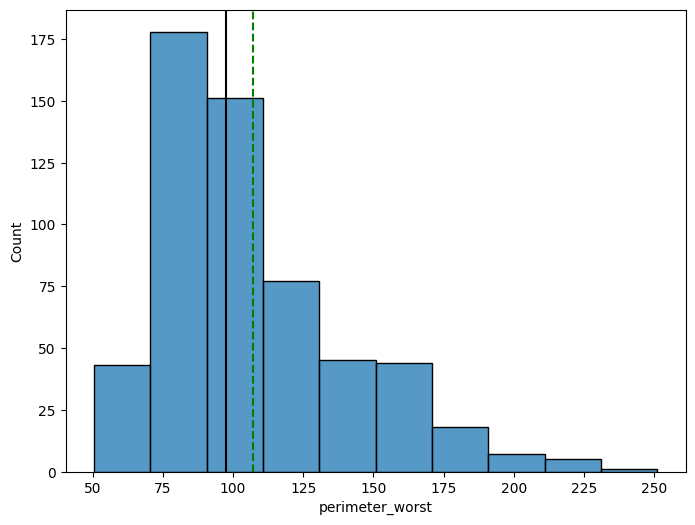

Measures of central tendency for area_worst
Mean: 880.5831282952548
Median: 686.5
Mode: 284.4

Measures of dispersion for area_worst
Standard Deviation: 569.3569926699492
Range: 4068.8



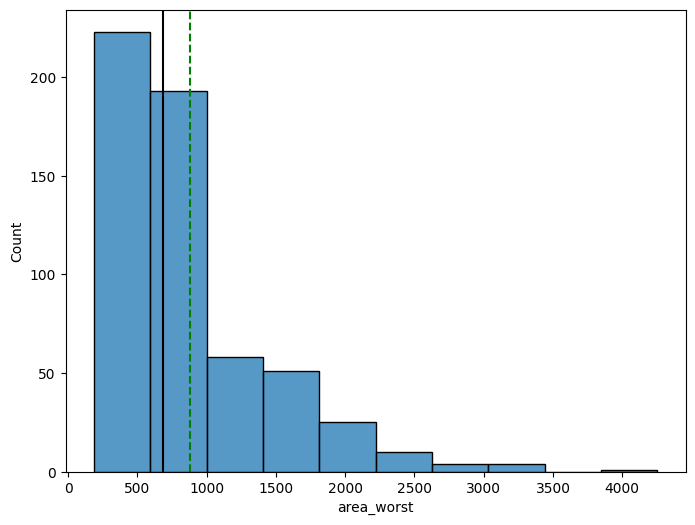

Measures of central tendency for smoothness_worst
Mean: 0.13236859402460457
Median: 0.1313
Mode: 0.1216

Measures of dispersion for smoothness_worst
Standard Deviation: 0.022832429404835458
Range: 0.15143



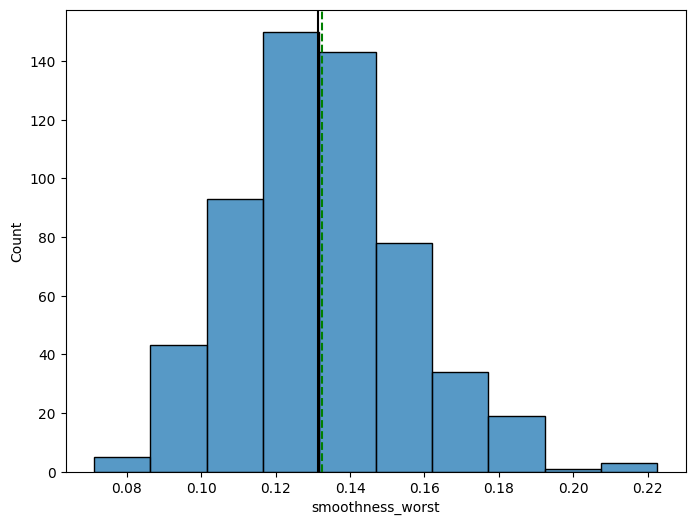

Measures of central tendency for compactness_worst
Mean: 0.25426504393673116
Median: 0.2119
Mode: 0.1486

Measures of dispersion for compactness_worst
Standard Deviation: 0.15733648891374194
Range: 1.03071



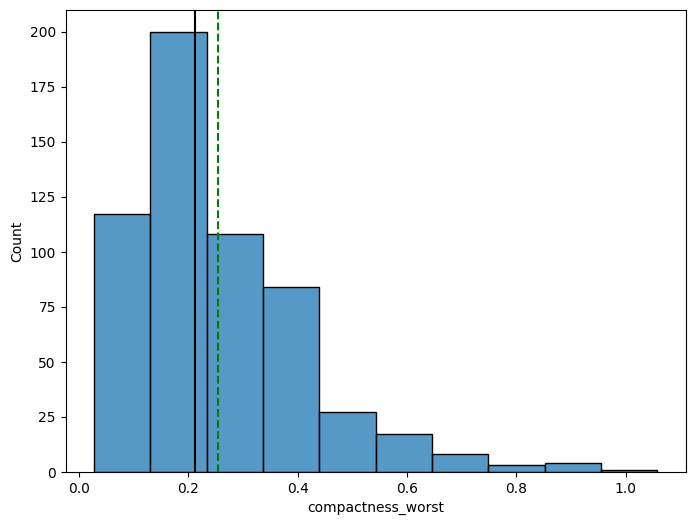

Measures of central tendency for concavity_worst
Mean: 0.27218848330404216
Median: 0.2267
Mode: 0.0

Measures of dispersion for concavity_worst
Standard Deviation: 0.20862428060813235
Range: 1.252



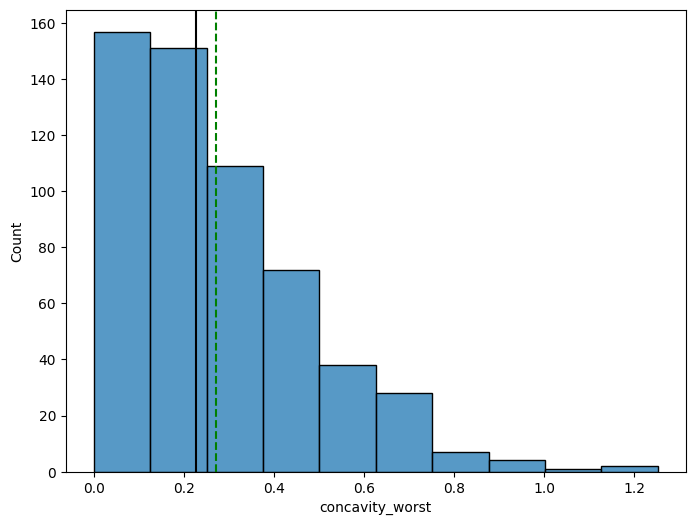

Measures of central tendency for concave points_worst
Mean: 0.11460622319859401
Median: 0.09993
Mode: 0.0

Measures of dispersion for concave points_worst
Standard Deviation: 0.0657323411959421
Range: 0.291



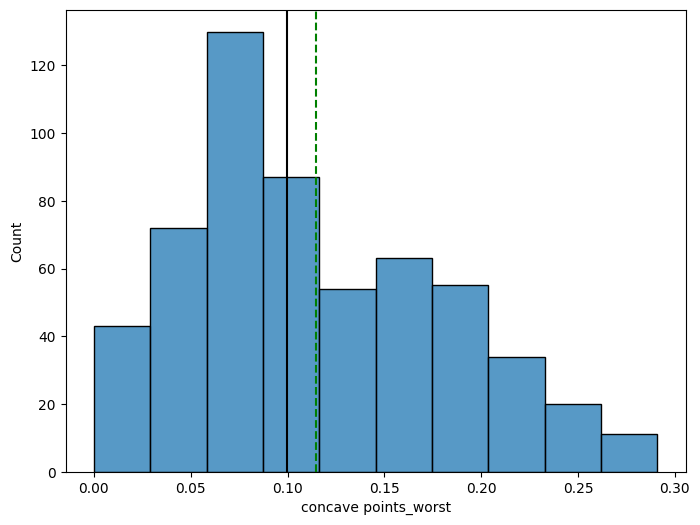

Measures of central tendency for symmetry_worst
Mean: 0.2900755711775044
Median: 0.2822
Mode: 0.2226

Measures of dispersion for symmetry_worst
Standard Deviation: 0.06186746753751869
Range: 0.5073



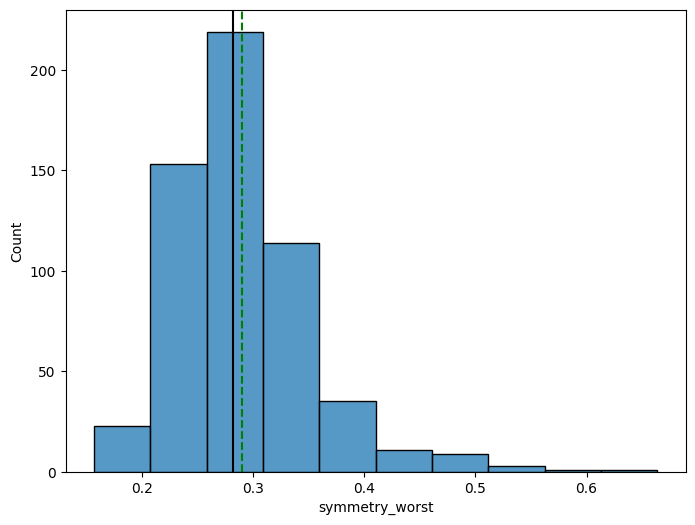

Measures of central tendency for fractal_dimension_worst
Mean: 0.0839458172231986
Median: 0.08004
Mode: 0.07427

Measures of dispersion for fractal_dimension_worst
Standard Deviation: 0.01806126734889399
Range: 0.15245999999999998



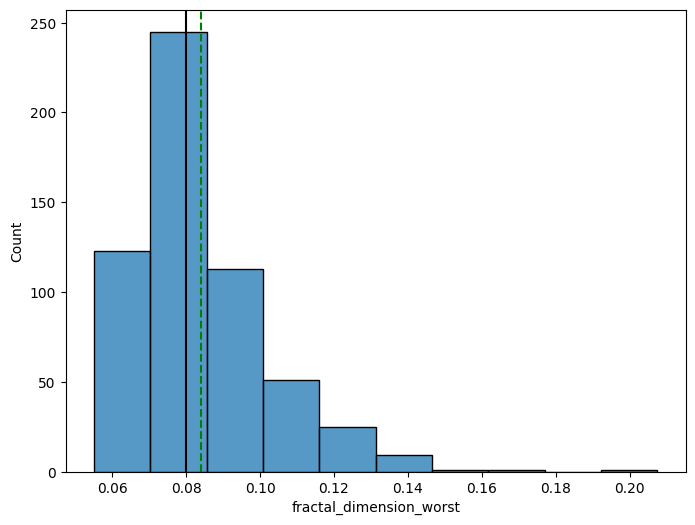

In [12]:
for col in numerical_cols:
    univariate_numerical_analysis(df, col)

## Bivariate Analysis

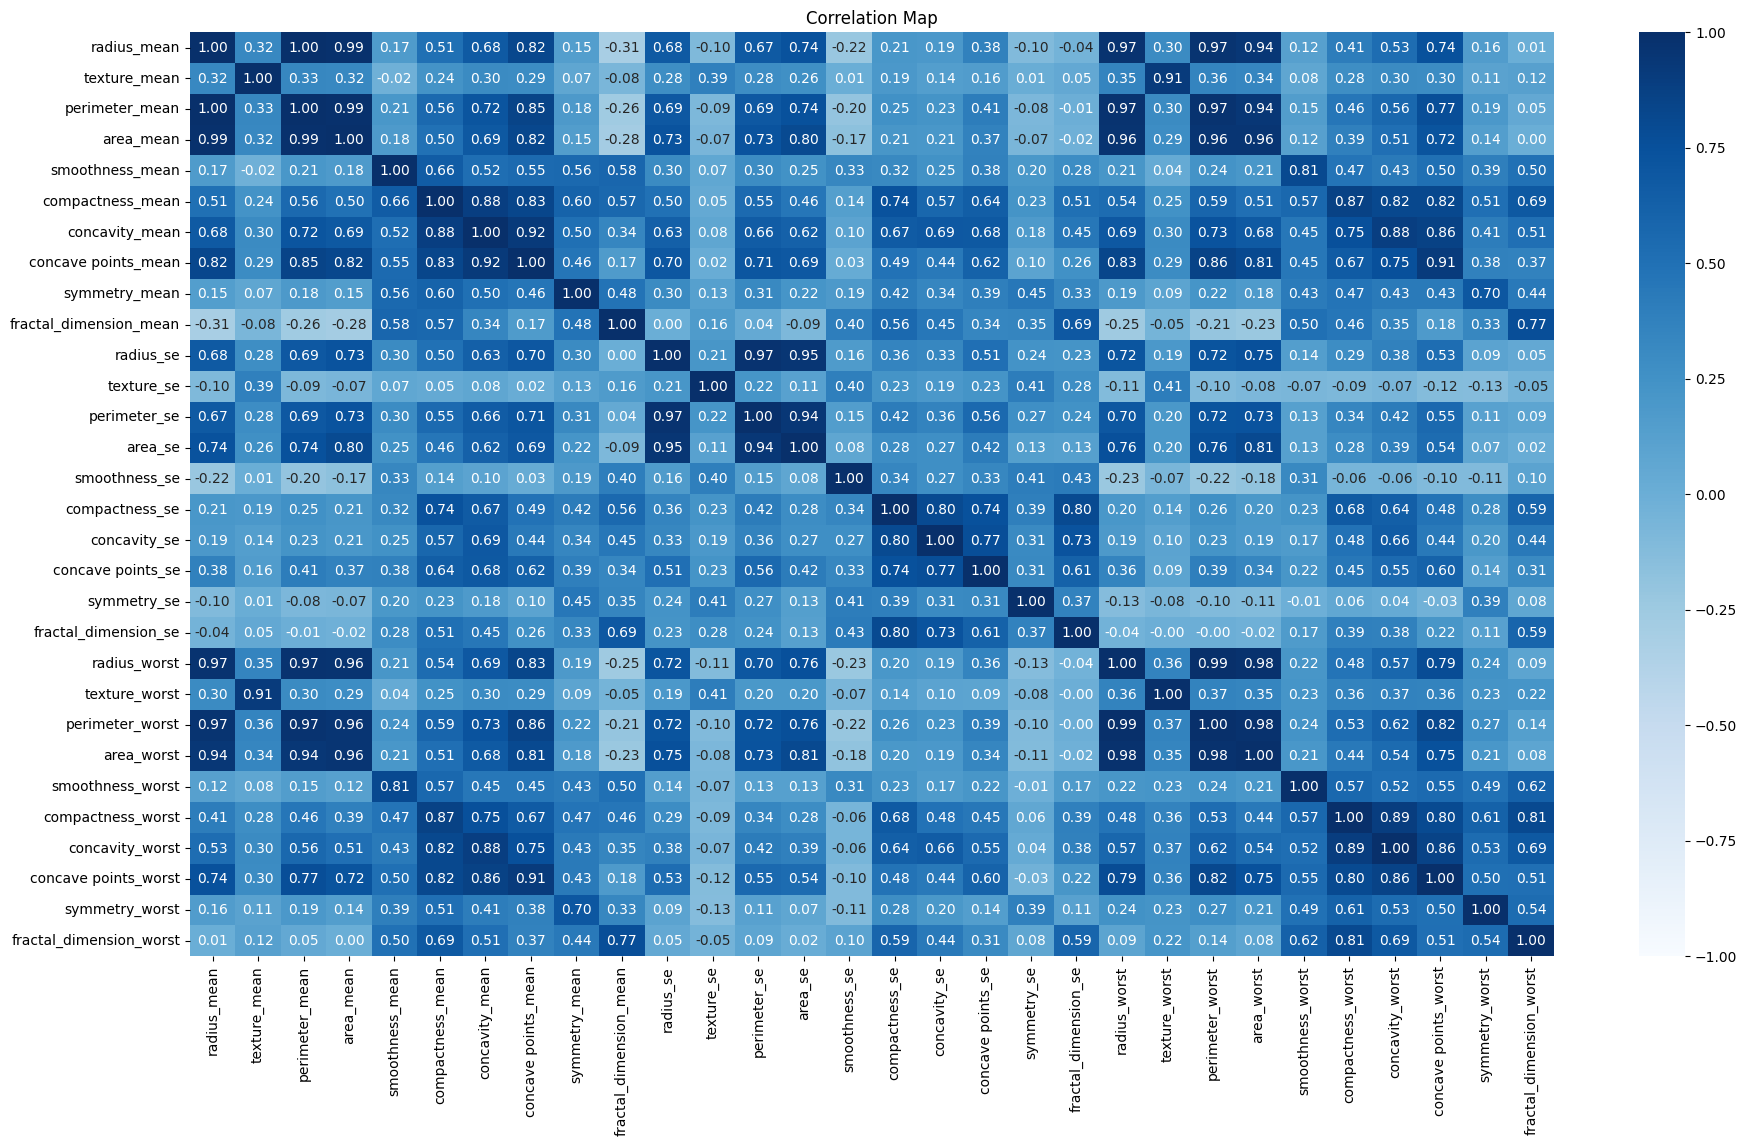

In [14]:
corr = df.corr()

plt.figure(figsize=(22,12))
sns.heatmap(corr, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='Blues')
plt.title('Correlation Map')
plt.show()

In [ ]:
sns.pairplot(df[numerical_cols])

In [15]:
X = df.drop(columns='diagnosis')
y = df['diagnosis']
y = y.map({'M':1, 'B':0})

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [17]:
dt = DecisionTreeClassifier(max_depth = 6, random_state=1)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [18]:
dt.score(X_train, y_train)

1.0

In [19]:
dt.score(X_test, y_test)

0.9122807017543859

In [23]:
print(classification_report(y_train, dt.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00       132

    accuracy                           1.00       341
   macro avg       1.00      1.00      1.00       341
weighted avg       1.00      1.00      1.00       341



In [24]:
print(classification_report(y_test, dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       148
           1       0.89      0.85      0.87        80

    accuracy                           0.91       228
   macro avg       0.91      0.90      0.90       228
weighted avg       0.91      0.91      0.91       228



In [25]:
importances = dt.feature_importances_
indices = np.argsort(importances)

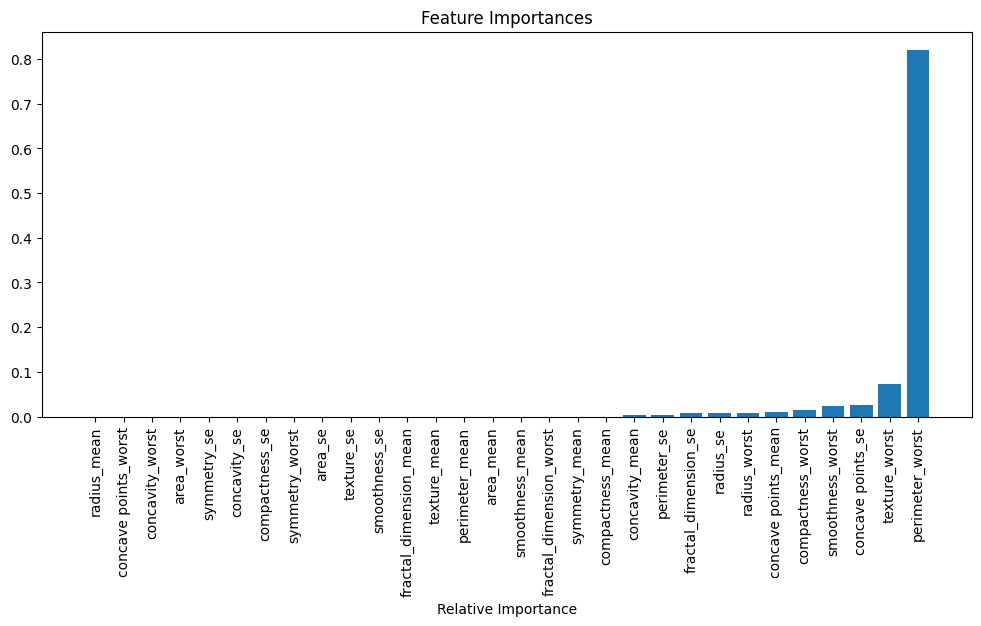

In [27]:
plt.figure(figsize=(12,5))
plt.title("Feature Importances")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), [X_train.columns[i] for i in indices], rotation = 90)
plt.xlabel("Relative Importance")
plt.show()

In [29]:
importances[indices][19:]

array([0.00393194, 0.00405611, 0.0082403 , 0.0082403 , 0.0082403 ,
       0.00923716, 0.01573904, 0.02320139, 0.02696825, 0.07223798,
       0.81990724])

In [30]:
significant_vars = [X_train.columns[i] for i in indices][19:]

In [32]:
dt = DecisionTreeClassifier(max_depth = 6, random_state=1)

dt.fit(X_train[significant_vars], y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [34]:
print(classification_report(y_train, dt.predict(X_train[significant_vars])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00       132

    accuracy                           1.00       341
   macro avg       1.00      1.00      1.00       341
weighted avg       1.00      1.00      1.00       341



In [36]:
print(classification_report(y_test, dt.predict(X_test[significant_vars])))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       148
           1       0.91      0.91      0.91        80

    accuracy                           0.94       228
   macro avg       0.93      0.93      0.93       228
weighted avg       0.94      0.94      0.94       228



## HyperParameter Tuning

In [40]:
clf = DecisionTreeClassifier()

parameter = {
    "max_depth": np.arange(3,10,1),
    "max_leaf_nodes": [50, 75, 150, 250, 300],
    "min_samples_split": [10, 20, 30, 50, 70, 100]
}

_grid_obj = GridSearchCV(clf, parameter, cv = 5, verbose = 1)
_grid_obj = _grid_obj.fit(X_train[significant_vars], y_train)

grid_clf = _grid_obj.best_estimator_

print(grid_clf)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
DecisionTreeClassifier(max_depth=4, max_leaf_nodes=50, min_samples_split=10)


In [41]:
grid_clf.fit(X_train[significant_vars], y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=50, min_samples_split=10)

In [42]:
print(classification_report(y_train, grid_clf.predict(X_train[significant_vars])))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       209
           1       0.96      0.98      0.97       132

    accuracy                           0.98       341
   macro avg       0.98      0.98      0.98       341
weighted avg       0.98      0.98      0.98       341



In [44]:
print(classification_report(y_test, grid_clf.predict(X_test[significant_vars])))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       148
           1       0.85      0.90      0.87        80

    accuracy                           0.91       228
   macro avg       0.90      0.91      0.90       228
weighted avg       0.91      0.91      0.91       228



### Randomized SearchCV

In [45]:
clf = DecisionTreeClassifier()

parameter = {
    "max_depth": np.arange(3,10,1),
    "max_leaf_nodes": [50, 75, 150, 250, 300, 350],
    "min_samples_split": [10, 20, 30, 50, 70, 100, 200]
}

_random_obj = RandomizedSearchCV(clf, parameter, cv = 5, n_iter=50, verbose = 1)
_random_obj = _random_obj.fit(X_train[significant_vars], y_train)

random_clf = _random_obj.best_estimator_

print(random_clf)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
DecisionTreeClassifier(max_depth=4, max_leaf_nodes=300, min_samples_split=10)


In [46]:
random_clf.fit(X_train[significant_vars], y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=300, min_samples_split=10)

In [47]:
print(classification_report(y_train, random_clf.predict(X_train[significant_vars])))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       209
           1       0.96      0.98      0.97       132

    accuracy                           0.98       341
   macro avg       0.98      0.98      0.98       341
weighted avg       0.98      0.98      0.98       341



In [48]:
print(classification_report(y_test, random_clf.predict(X_test[significant_vars])))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       148
           1       0.85      0.90      0.87        80

    accuracy                           0.91       228
   macro avg       0.90      0.91      0.90       228
weighted avg       0.91      0.91      0.91       228



## Post Pruning

In [52]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train[significant_vars], y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [53]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.002903,0.011611
2,0.003910,0.015521
3,0.004692,0.020213
4,0.007468,0.027681
5,0.008590,0.044861
6,0.011009,0.055870
7,0.011550,0.067420
8,0.029585,0.097005
9,0.377501,0.474506


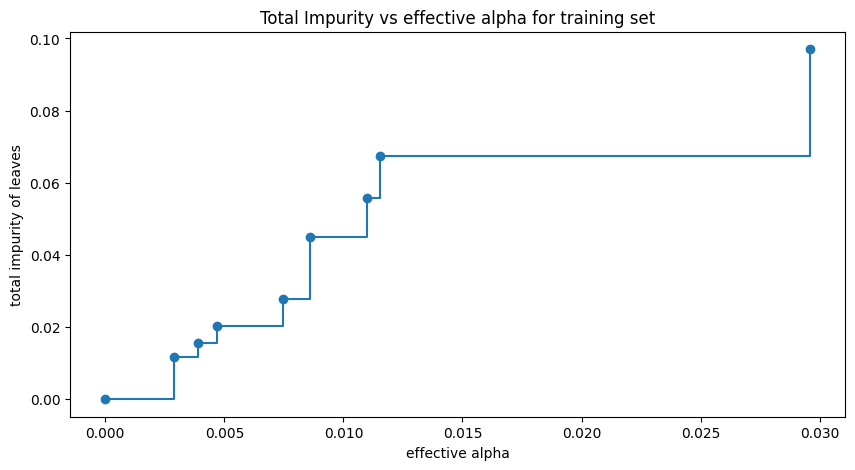

In [54]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1],marker="o", drawstyle = "steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [55]:
clfs=[]

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
    ccp_alpha = ccp_alpha
    )
    clf.fit(X_train[significant_vars], y_train)
    clfs.append(clf)
    
print("Number of nodes in the last tree is:{} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is:1 with ccp_alpha: 0.3775009355228311


In [56]:
recall_train_score = []
for clf in clfs:
    pred_train = clf.predict(X_train[significant_vars])
    recall_train = recall_score(y_train, pred_train)
    recall_train_score.append(recall_train)

In [57]:
recall_test_score = []
for clf in clfs:
    pred_test = clf.predict(X_test[significant_vars])
    recall_test = recall_score(y_test, pred_test)
    recall_test_score.append(recall_test)

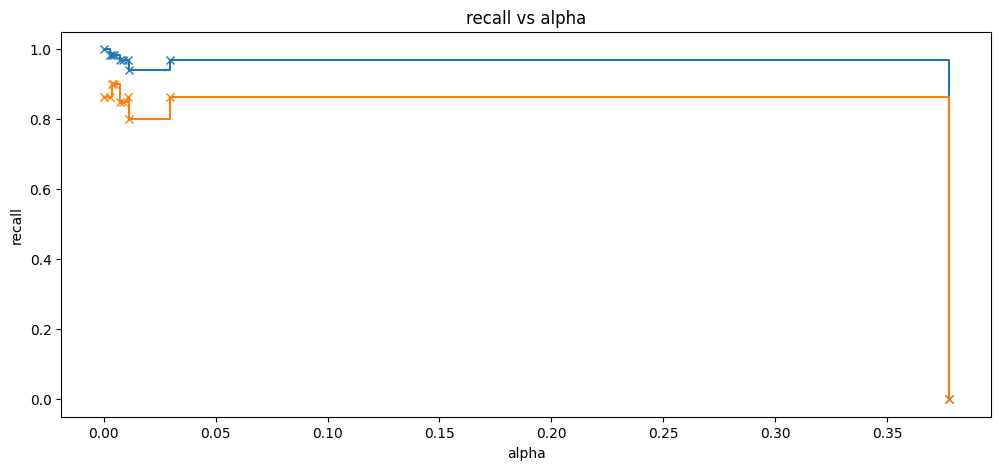

In [58]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("recall")
ax.set_title("recall vs alpha")
ax.plot(ccp_alphas, recall_train_score, marker="x", label="train data", drawstyle = "steps-post")
ax.plot(ccp_alphas, recall_test_score, marker="x", label="test data", drawstyle = "steps-post")
plt.show()

In [59]:
index_best_model = np.argmax(recall_test_score)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0039100684261974585)


In [60]:
print(classification_report(y_train, best_model.predict(X_train[significant_vars])))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       209
           1       0.99      0.98      0.99       132

    accuracy                           0.99       341
   macro avg       0.99      0.99      0.99       341
weighted avg       0.99      0.99      0.99       341



In [61]:
print(classification_report(y_test, best_model.predict(X_test[significant_vars])))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       148
           1       0.92      0.90      0.91        80

    accuracy                           0.94       228
   macro avg       0.93      0.93      0.93       228
weighted avg       0.94      0.94      0.94       228



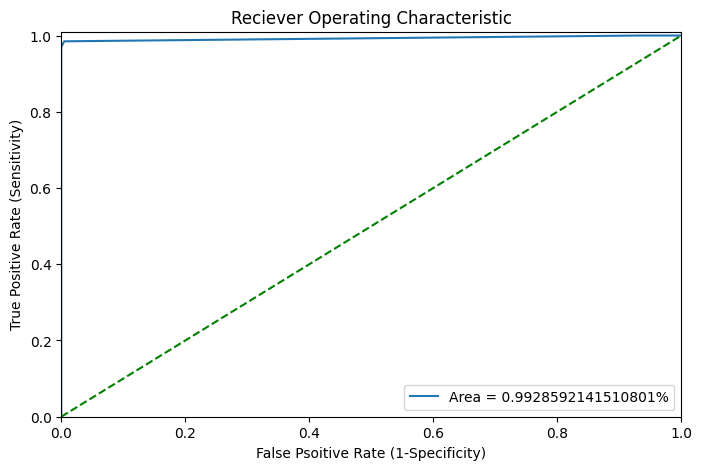

In [65]:
#ROC_AUC_CURVE

fpr, tpr, thresholds = roc_curve(y_train, best_model.predict_proba(X_train[significant_vars])[:,1])
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label=f"Area = {roc_auc_score(y_train, best_model.predict_proba(X_train[significant_vars])[:, 1])}%")
plt.plot([0, 1], [0, 1], "g--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('Reciever Operating Characteristic')
plt.xlabel('False Psoitive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

#AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_train, best_model.predict_proba(X_train[significant_vars])[:, 1])